In [6]:
import numpy as np
from scipy import interpolate
from scipy.io import wavfile

import matplotlib.pyplot as plt
# from matplotlib import cm as colormaps

from importlib import reload

In [7]:
floor = lambda x: 50 * np.sin(0.005 * x + 37) - 2000

# Generate ceiling
ceiling = lambda x: 0 * np.ones_like(x)

In [8]:
import environment as Env
reload(Env)

# Generate vertical margin
margin_z = 1  # TODO: include in simulation (implicit)
range_min = np.array([0, -5000 - margin_z])
range_max = np.array([10000, 0 + margin_z])

# Generate environment
env = Env.Environment2D (floor, ceiling, range_min, range_max)

In [38]:
import ray as Ray
reload(Ray)

source = np.array([0., 0.])
target = np.array([4000, -1000])

ray = Ray.Ray2D (env, source, angle=-1.)
ray.propagate()

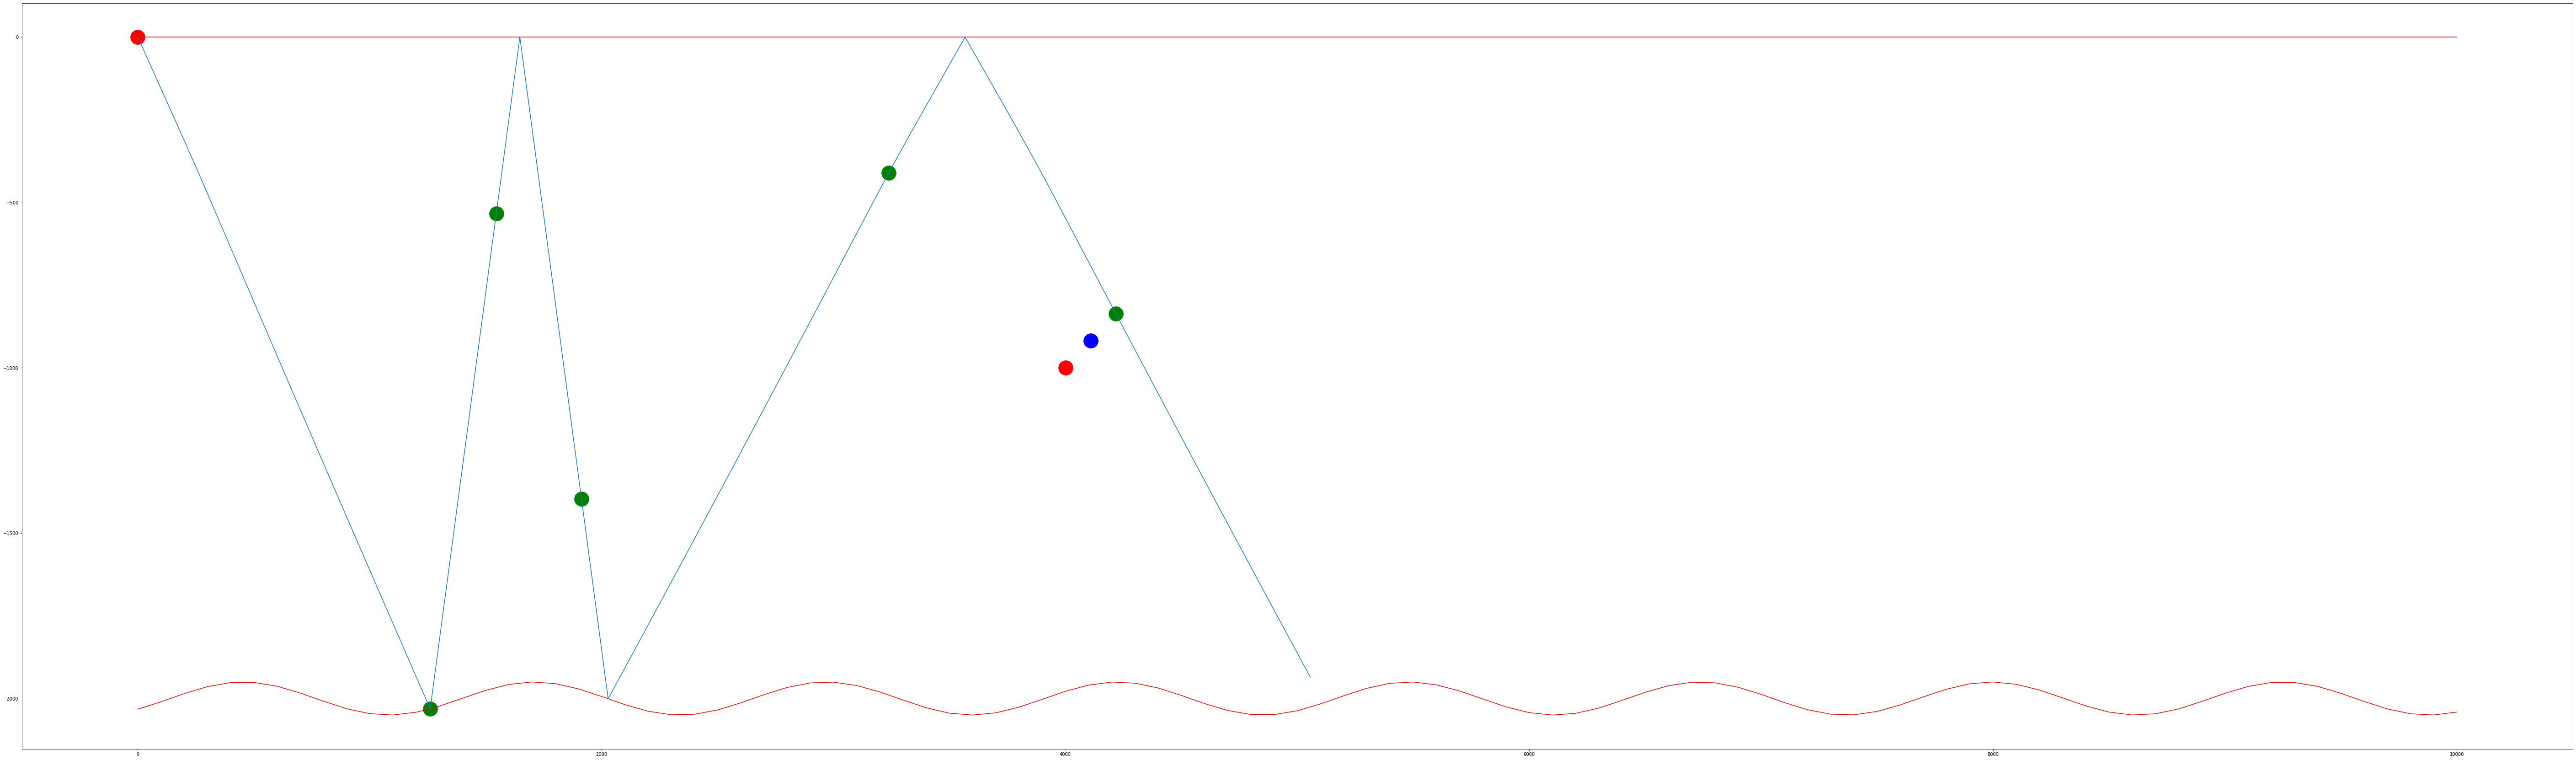

In [45]:
figsize = (100, 30)

fig = plt.figure(figsize=figsize)

env.plot(fig, c='red')
plt.scatter((source[0], target[0]), (source[1], target[1]), figure=fig, c='red', s=1000)
ray.plot(fig)

plt.scatter(1260.88310278, -2031.3, figure=fig, c='green', s=1000)
plt.scatter(1545.7733129, -533.64508078, figure=fig, c='green', s=1000)
plt.scatter(1913.3504379, -1396.9, figure=fig, c='green', s=1000)
plt.scatter(3238.03161709, -410.97901976, figure=fig, c='green', s=1000)
plt.scatter(4217.42474154, -836.1, figure=fig, c='green', s=1000)

# Midpoint
plt.scatter(4108.71237077, -918.05, figure=fig, c='blue', s=1000)

plt.show(fig)

In [51]:
# Closest simulation step to the target (euclidian distance)
step = ray.closest_step_to_point(target)

# Vector from closest step to target
target_vector = target - ray.XZ[step]
midpoint = (target + ray.XZ[step]) / 2

In [52]:
f = 100

dist = np.linalg.norm(target_vector)
env.penv.calc_dl_dG(f, midpoint[1]) * dist  # Total attenuation (* -1)

0.2259280526795343